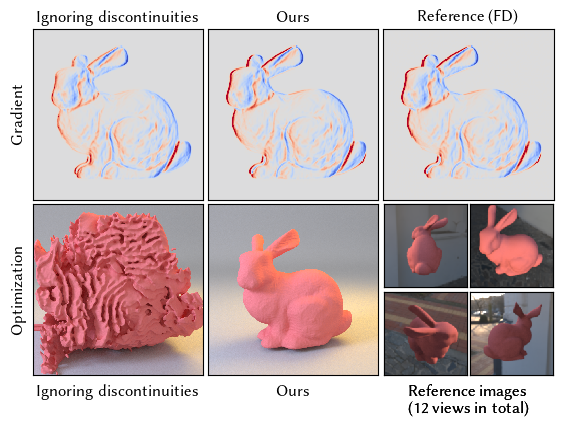

In [4]:
%reload_ext autoreload
%autoreload 2

import sys
import os
sys.path.append(os.path.abspath('../'))
from common import *
import configs
import matplotlib.gridspec as gridspec

from constants import OUTPUT_DIR

fig_name = 'shading_gradient'
fig_dir = join(FIGURE_DIR, fig_name)

scene_name = 'bunny'
used_configs = [configs.OnlyShadingGrad(), configs.Warp(), configs.FiniteDifferences()]
output_dir = join(OUTPUT_DIR, scene_name, 'no-tex-12-hq', used_configs[0].name)

y_offset = -0.1
fontsize = 12
n_rows = 2
n_cols = 3
total_width = COLUMN_WIDTH
aspect = n_rows / n_cols
fig = plt.figure(1, figsize=(total_width, aspect * total_width), constrained_layout=False)

gs = fig.add_gridspec(n_rows, n_cols, wspace=0.025, hspace=0.025)
r = 15
row = 0

names = ['Ignoring discontinuities', 'Ours', 'Reference (FD)']

# Show gradient images
for col, (config, config_name_pretty) in enumerate(zip(used_configs, names)):
    ax = fig.add_subplot(gs[row, col])
    fn = f'{scene_name}_{config.name}_x.exr'
    img = read_img(join(fig_dir, scene_name, fn), tonemap=False)
    img = img[50:-50, 50:-50, :]
    aspect = img.shape[0] / img.shape[1]
    img = np.repeat(np.repeat(img, 4, axis=0), 4, axis=1)
    ax.imshow(np.mean(img, axis=-1), cmap='coolwarm_r', vmin=-r, vmax=r, interpolation='none')
    disable_ticks(ax)
    if col == 0:
        ax.set_ylabel(f'Gradient', labelpad=5, fontsize=fontsize)
    txt = ax.set_title(config_name_pretty, fontsize=fontsize, va='top', y=1.07)

# Display optimization results
row += 1
used_configs = [configs.OnlyShadingGrad(), configs.Warp()]
for col, (config, config_name_pretty) in enumerate(zip(used_configs, names)):
    ax = fig.add_subplot(gs[row, col])
    fn = f'{config.name}_final.exr'
    img = read_img(join(fig_dir, scene_name, fn), tonemap=True)
    aspect = img.shape[0] / img.shape[1]
    img = np.repeat(np.repeat(img, 4, axis=0), 4, axis=1)
    ax.imshow(img, interpolation='none')
    disable_ticks(ax)
    if col == 0:
        ax.set_ylabel(f'Optimization', labelpad=5, fontsize=fontsize)
    txt = ax.set_title(config_name_pretty, fontsize=fontsize, va='top', y=-0.1)

    ax = fig.add_subplot(gs[row, -1])
    if row == n_rows - 1:
        txt = ax.set_title('Reference images \n (12 views in total)', fontsize=fontsize, y=y_offset, va='top')
    ax.set_axis_off()

    gs_insets = gridspec.GridSpecFromSubplotSpec(2, 2, subplot_spec=gs[row, -1], wspace=0.00, hspace=0.05)
    ref_views = [0, 3, 7, 10]
    for idx, ref_view in enumerate(ref_views):
        r = idx // 2
        c = idx % 2
        ax = fig.add_subplot(gs_insets[r, c])
        img = read_img(join(output_dir, f'ref-{ref_view:02d}.exr'))
        ax.imshow(img, interpolation='none')
        disable_ticks(ax)

plt.margins(0, 0)
# save_fig(fig_name)